<a href="https://colab.research.google.com/github/Kaustubh-D-Karkhanis/NLP_IA/blob/main/NLP_IA_(Toxic_Comment_using_LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP IA:**
## **Team Members:**

Kaustubh Karkhanis

Shreya Moily

Tejas Jagtap

Anushka Karamchandani

# Toxic Comments Classification

## Problem Statement :

Toxic comments, including hate speech, harassment, and offensive language, are pervasive in online communities and social media platforms.

These comments not only degrade user experience but also contribute to the propagation of harmful behavior and discrimination.

The goal is to develop a machine learning model to classify toxic comments in online discussions.

Given a dataset of comments labeled with various forms of toxicity (e.g., toxic, severe toxic, obscene, etc.), the model should accurately predict the toxicity level of each comment.

## Installing Dependencies and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import TextVectorization, Embedding, LSTM, Bidirectional, Dense
from keras.models import Sequential
from keras.metrics import Precision, Recall, CategoricalAccuracy
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_url = '/content/drive/MyDrive/kaggle dataset/train.csv'
test_url = '/content/drive/MyDrive/kaggle dataset/test.csv'
df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [5]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

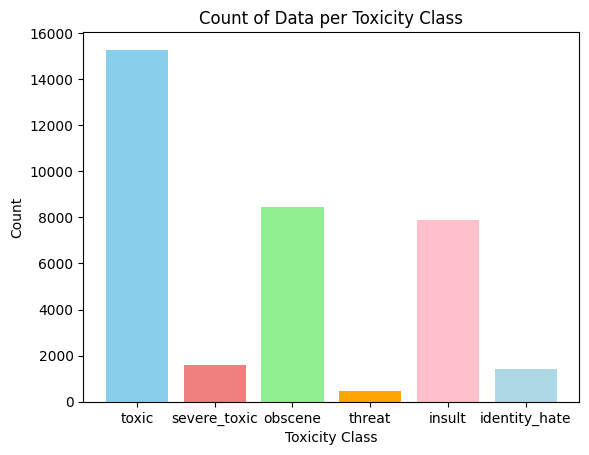

In [7]:
label_counts = df.iloc[:, 2:].sum()

colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'pink', 'lightblue']

positions = range(len(label_counts))
labels = label_counts.index

plt.bar(positions, label_counts, color=colors)
plt.xticks(positions, labels, rotation=0)
plt.xlabel('Toxicity Class')
plt.ylabel('Count')
plt.title('Count of Data per Toxicity Class')
plt.show()

###TEJAS

## Preprocessing

In [8]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [9]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [10]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

This code snippet involves setting up text vectorization using the TextVectorization layer provided by TensorFlow.

1) MAX_FEATURES = 200000: This line defines a constant MAX_FEATURES with a value of 200,000. This constant represents the maximum number of unique tokens (words or characters) that the text vectorization layer will consider. Tokens beyond this limit will be ignored.

2) vectorizer = TextVectorization(...): This line initializes a text vectorization layer. The TextVectorization layer is used for converting variable-length texts into fixed-size numerical vectors, which can be fed into a neural network.

3) max_tokens=MAX_FEATURES: In this argument, max_tokens specifies the maximum number of unique tokens to be considered during vectorization. Here, it's set to the previously defined MAX_FEATURES, indicating that the vectorizer should consider up to 200,000 unique tokens.

4) output_sequence_length=1800: This argument specifies the desired length of the output sequences. In this case, it's set to 1800, meaning that all output sequences will be padded or truncated to a length of 1800 tokens. This ensures uniformity in the input data, which is necessary for feeding it into a neural network.

5) output_mode='int': This argument specifies the type of output generated by the vectorizer. Here, it's set to 'int', indicating that the output will be integer representations of the tokens.

6) vectorizer.adapt(X.values): This line adapts the vectorizer to the data X.values, where X presumably contains the text data to be vectorized. During adaptation, the vectorizer learns the vocabulary of the input data and prepares itself for vectorization based on that vocabulary.

7) vectorizer.get_vocabulary(): This method returns the vocabulary learned by the vectorizer during adaptation. The vocabulary consists of all the unique tokens encountered in the input data, sorted by frequency.

In [11]:
MAX_FEATURES = 200000
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')
vectorizer.adapt(X.values)
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

1) vectorized_text = vectorizer(X.values): This line applies the text vectorization process to the input text data X.values using the vectorizer object. It takes the input text data and converts it into numerical representations based on the vocabulary learned during adaptation. The result is stored in the variable vectorized_text.

2) vectorized_text: This variable holds the output of the text vectorization process. It contains numerical representations of the input texts, where each text is converted into a fixed-size numerical vector according to the parameters specified during the setup of the vectorizer.

In [12]:
vectorized_text = vectorizer(X.values)
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

##KAUSTUBH

This code prepares a TensorFlow dataset for training, validation, and testing purposes using the provided vectorized text data (vectorized_text) and labels (y). It performs the following steps:

1) Creates a TensorFlow dataset from the tensor slices of the vectorized text and labels.

2) Caches the dataset, potentially speeding up training by caching elements in memory.

3) Shuffles the dataset with a buffer size of 159,571.

4) Batches the dataset into batches of size 810.

5) Prefetches 196 batches, allowing the data pipeline to asynchronously fetch batches while the model is training.

6) Splits the dataset into training (80%), validation (10%), and testing (10%) subsets.

7) Returns the lengths of the training, validation, and testing subsets.







In [13]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset = dataset.cache()
dataset = dataset.shuffle(159571)
dataset = dataset.batch(810)
dataset = dataset.prefetch(196)

train = dataset.take(int(len(dataset)*0.8))
val = dataset.skip(int(len(dataset)*0.8)).take(int(len(dataset)*0.1))
test = dataset.skip(int(len(dataset)*0.9)).take(int(len(dataset)*0.1))
len(train),len(val),len(test)

(158, 19, 19)

The output of train.as_numpy_iterator().next() will represent the first batch of data from the training dataset converted into NumPy arrays. It will include the vectorized text data and corresponding labels in a format suitable for NumPy operations or further processing.

In [14]:
train.as_numpy_iterator().next()

(array([[ 136,  428, 1521, ...,    0,    0,    0],
        [3290,  622,  533, ...,    0,    0,    0],
        [  14,  382,   38, ...,    0,    0,    0],
        ...,
        [  76,   88,    7, ...,    0,    0,    0],
        [   8,  178, 1856, ...,    0,    0,    0],
        [   7, 1703,   12, ...,    0,    0,    0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0]]))

## Building the Deep Neural Network

In [15]:
model = Sequential([
    # Embedding Layer
    Embedding(MAX_FEATURES+1,30),
    # Bidirectional LSTM Layer
    Bidirectional(LSTM(30,activation='tanh', return_sequences=True)),
    Bidirectional(LSTM(30,activation='tanh')),
    # Hidden Layer for feature extraction
    Dense(300,activation='relu'),
    Dense(30,activation='relu'),
    # Final Layer
    Dense(6,activation='sigmoid')
])
model.compile(loss='BinaryCrossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 30)          6000030   
                                                                 
 bidirectional (Bidirection  (None, None, 60)          14640     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 60)                21840     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 300)               18300     
                                                                 
 dense_1 (Dense)             (None, 30)                9030      
                                                                 
 dense_2 (Dense)             (None, 6)                 1

In [16]:
#from tensorflow.keras.models import load_model
#model_path = '/content/drive/MyDrive/toxic-comment-model.h5'
#model = load_model(model_path)

In [17]:
history = model.fit(train, epochs=7, validation_data = val)

Epoch 1/7
158/158 [==============================] - 108s 619ms/step - loss: 0.1632 - accuracy: 0.7925 - val_loss: 0.0653 - val_accuracy: 0.9936
Epoch 2/7
158/158 [==============================] - 96s 606ms/step - loss: 0.0559 - accuracy: 0.9942 - val_loss: 0.0466 - val_accuracy: 0.9933
Epoch 3/7
158/158 [==============================] - 90s 567ms/step - loss: 0.0451 - accuracy: 0.9940 - val_loss: 0.0437 - val_accuracy: 0.9934
Epoch 4/7
158/158 [==============================] - 91s 573ms/step - loss: 0.0416 - accuracy: 0.9941 - val_loss: 0.0358 - val_accuracy: 0.9938
Epoch 5/7
158/158 [==============================] - 89s 559ms/step - loss: 0.0370 - accuracy: 0.9943 - val_loss: 0.0354 - val_accuracy: 0.9932
Epoch 6/7
158/158 [==============================] - 87s 546ms/step - loss: 0.0338 - accuracy: 0.9943 - val_loss: 0.0315 - val_accuracy: 0.9951
Epoch 7/7
158/158 [==============================] - 86s 543ms/step - loss: 0.0325 - accuracy: 0.9941 - val_loss: 0.0287 - val_accuracy

##SHREYA

### Ploting Accuracy and Loss

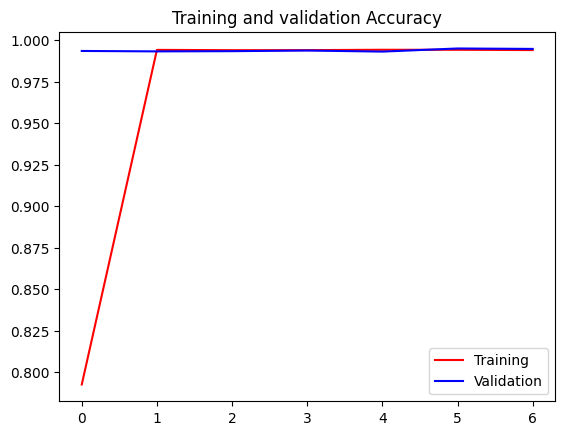

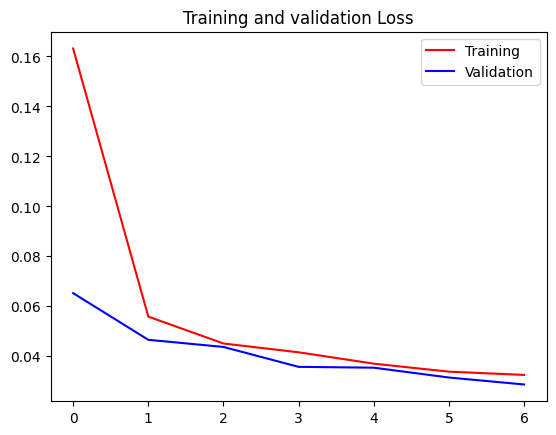

In [18]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation Accuracy')
plt.legend(labels = ['Training', 'Validation'])
plt.show()
print("")

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation Loss')
plt.legend(labels = ['Training', 'Validation'])
plt.show()

## Evaluating the Model

pre = Precision(), re = Recall(), acc = CategoricalAccuracy(): These lines instantiate objects of three different metric classes provided by TensorFlow/Keras. These classes are used to calculate precision, recall, and categorical accuracy, respectively.

The code then iterates over batches of data in the test dataset using a loop: for batch in test.as_numpy_iterator():.

Within each iteration, it unpacks the batch into input data (X_true) and corresponding true labels (y_true).

It uses the model (model) to make predictions (yhat) on the input data.

Since the predictions and true labels might be in different shapes (e.g., if the model predicts probabilities for each class), the code flattens both the predictions and true labels to make them compatible for metric calculation: y_true = y_true.flatten() and yhat = yhat.flatten().

It then updates the state of each metric (pre, re, and acc) with the true labels and predicted labels from the current batch using the update_state method.

After iterating over all batches in the test dataset, it retrieves the computed metrics' results using the result() method for each metric. These results represent the overall Precision, Recall, and Accuracy over the entire test dataset.

Finally, it prints out the calculated Precision, Recall, and Accuracy values using print() statements.

In [19]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    #acc.update_state(y_true, yhat)

print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}')

26/26 [==============================] - 2s 73ms/step
Precision: 0.8583437204360962, Recall:0.8089788556098938


## Making Predictions

test_comments = test_df['comment_text'].values: This line retrieves the comment text data from a DataFrame named test_df and stores it as a NumPy array called test_comments. It assumes that test_df contains a column named 'comment_text' containing the comment text data.

input_text = vectorizer(test_comments): This line applies the text vectorization process to the comment text data (test_comments) using the previously configured vectorizer. It converts the text data into numerical representations based on the learned vocabulary during adaptation. The result is stored in the variable input_text, which contains numerical representations of the comment text suitable for further evaluation or prediction using machine learning models.

In [20]:
test_comments = test_df['comment_text'].values
input_text = vectorizer(test_comments)

result = model.predict(input_text): This line uses the trained model (model) to predict the probabilities of each class for the input comments represented by input_text. The output is a NumPy array (result) containing the predicted probabilities for each class.

test_pred = pd.DataFrame(...): This line creates a pandas DataFrame (test_pred) to organize the predicted results. It creates columns for each class using the column names from the original DataFrame (df). The columns include the comment text as well as the predicted probabilities for each class. The result[:, i] syntax extracts the predicted probabilities for each class i from the result array.

test_pred.head(): This line displays the first few rows of the DataFrame test_pred, showing the comment text alongside the predicted probabilities for each class, providing an initial overview of the model's predictions for the test dataset.

In [21]:
result = model.predict(input_text)
test_pred = pd.DataFrame({df.columns[1]: test_comments,
                            df.columns[2]: result[:, 0],
                            df.columns[3]: result[:, 1],
                            df.columns[4]: result[:, 2],
                            df.columns[5]: result[:, 3],
                            df.columns[6]: result[:, 4],
                            df.columns[7]: result[:, 5]
                            })
test_pred.head()


4787/4787 [==============================] - 380s 79ms/step


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Yo bitch Ja Rule is more succesful then you'll...,0.996145,4.587569e-01,0.986812,0.053026,0.923569,0.316878
1,== From RfC == \n\n The title is fine as it is...,0.000273,3.703197e-07,0.000096,0.000044,0.000049,0.000047
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0.004780,5.028508e-06,0.000734,0.000313,0.000643,0.000379
3,":If you have a look back at the source, the in...",0.000449,6.442499e-07,0.000138,0.000064,0.000074,0.000068
4,I don't anonymously edit articles at all.,0.000414,6.242885e-07,0.000130,0.000065,0.000073,0.000071


## Saving the Model

In [ ]:
model_file = 'models/toxic-comment-model(latest).h5'
vectorizer_file = "models/text-vectorizer(latest).pkl"
model.save(model_file)
# Pickle the config and weights
pickle.dump({'config': vectorizer.get_config(),
             'weights': vectorizer.get_weights()},
            open(vectorizer_file, "wb"))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files

files.download(model_file)
files.download(vectorizer_file)

### Saving Predicted Result

In [ ]:
test_pred.to_csv('test_prediction(latest).csv')

files.download('test_prediction(latest).csv')

##Application:


1.   Educational Platforms: Identifying and managing toxic interactions in online learning environments to create a more positive and inclusive learning environment.
2.   Psychological Research: Studying toxic comments to understand patterns of aggression, cyberbullying, and online harassment, and their impact on mental health.
3. Law Enforcement: Analyzing online discussions to identify potential threats or criminal behavior.
4. Customer Support: Identifying and prioritizing toxic comments in customer support channels to ensure that the most urgent issues are addressed promptly.



## Conclusion:
The model successfully categorizes toxic comments in online discussions, helping to identify and manage harmful content.

By using embeddings and LSTM layers, the model can understand the context and sequence of words in comments, improving its ability to detect toxicity.

Overall, the model serves as a valuable tool for creating safer online environments by automatically flagging and addressing toxic comments.
